# NBA Player Salary and Performance Analysis (2017-18 Season)

## Introduction
This project analyzes the 2017-18 NBA player salary and performance data. Using SQL queries and Python visualizations, we explore insights such as:
- Top-paid players and their performance.
- Salary distribution across positions and teams.
- Relationships between age, salary, and performance metrics.

The analysis includes:
1. Data Exploration (SQL queries to extract insights).
2. Visualizations (Matplotlib, Seaborn, and Plotly).
3. Key Findings and Trends.

## Data Description
We have access to two main tables:
1. **NBA_season1718_salary**: Contains player salary information for the 2017-18 season.
   - `Player`: Name of the player.
   - `Tm`: Team abbreviation.
   - `season17_18`: Player's salary.

2. **Seasons_Stats**: Contains player performance data for various seasons.
   - `Year`: Season year.
   - `Player`: Player name.
   - `Tm`: Team abbreviation.
   - `Age`: Player's age.
   - `PER`: Player Efficiency Rating.
   - `PTS`: Total points scored.
   - `WS`: Win Shares (player contribution to team wins).
   - `Pos`: Player's position (PG, SG, SF, PF, C).

## Key Objectives
1. Identify the highest-paid players and their performance.
2. Explore salary distributions across positions and teams.
3. Analyze correlations between salary, performance, and age.
4. Present findings using effective visualizations.


In [25]:
# Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Connect to the SQLite database
database_path = 'nba_salary.sqlite'  # Update with your database file path
conn = sqlite3.connect(database_path)

# Load data for analysis
query = """
SELECT 
    salary.Player,
    salary.Tm AS Team,
    salary.season17_18 AS Salary,
    stats.PER,
    stats.PTS,
    stats.WS,
    stats.Age,
    stats.Pos
FROM 
    NBA_season1718_salary AS salary
JOIN 
    Seasons_Stats AS stats
ON 
    salary.Player = stats.Player
WHERE 
    stats.Year = 2017;
"""
data = pd.read_sql(query, conn)

data


,Player,Team,Salary,PER,PTS,WS,Age,Pos
0,Alex Abrines,OKC,5725000.0,10.1,406.0,2.1,23.0,SG
1,Quincy Acy,BRK,1709538.0,11.8,222.0,0.9,26.0,PF
2,Quincy Acy,BRK,1709538.0,-1.4,13.0,-0.1,26.0,PF
3,Quincy Acy,BRK,1709538.0,13.1,209.0,1.1,26.0,PF
4,Steven Adams,OKC,22471910.0,16.5,905.0,6.4,23.0,C
...,...,...,...,...,...,...,...,...
547,Cody Zeller,CHO,12584270.0,16.7,639.0,5.6,24.0,PF
548,Tyler Zeller,MIL,1709538.0,13.0,178.0,1.0,27.0,C
549,Stephen Zimmerman,LAL,1312611.0,7.3,23.0,0.0,20.0,C
550,Paul Zipser,CHI,1312611.0,6.9,240.0,0.5,22.0,SF


# Top 10 Highest Paid NBA Players (2017-18)
## This bar chart displays the top 10 highest-paid players in the 2017-18 season. It highlights the players with the largest salaries, showing Stephen Curry and LeBron James at the top.

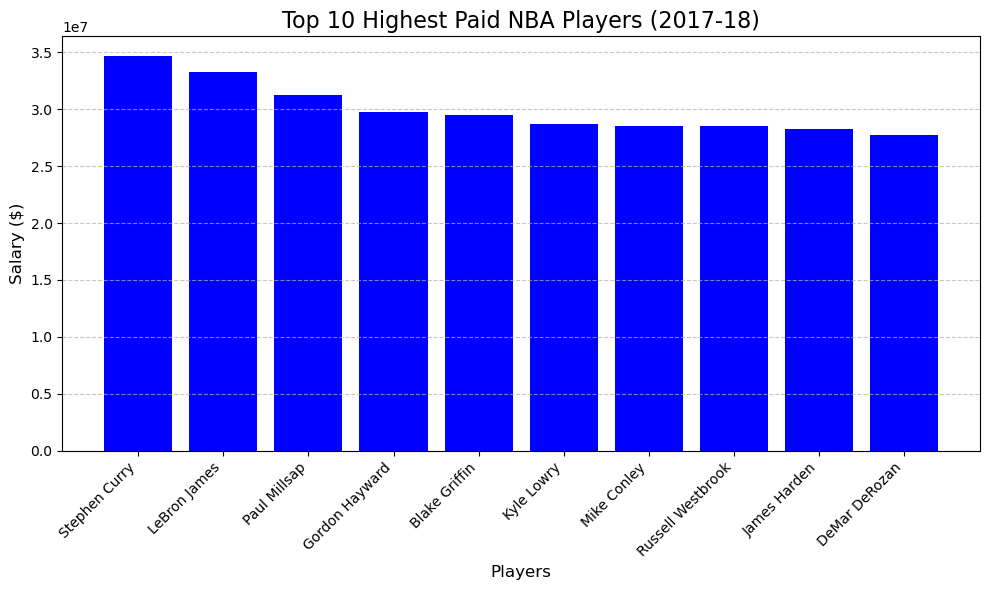

In [18]:

# Plotting
top_10_salary = data.nlargest(10, 'Salary')

plt.figure(figsize=(10, 6))
plt.bar(top_10_salary['Player'], top_10_salary['Salary'], color='blue')
plt.title('Top 10 Highest Paid NBA Players (2017-18)', fontsize=16)
plt.xlabel('Players', fontsize=12)
plt.ylabel('Salary ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Correlation Between Salary and Player Efficiency Rating (PER)
### This scatter plot shows the relationship between player salaries and Player Efficiency Rating (PER). A regression line is added to observe trends. Higher salaries generally correspond to higher efficiency, though some outliers exist.


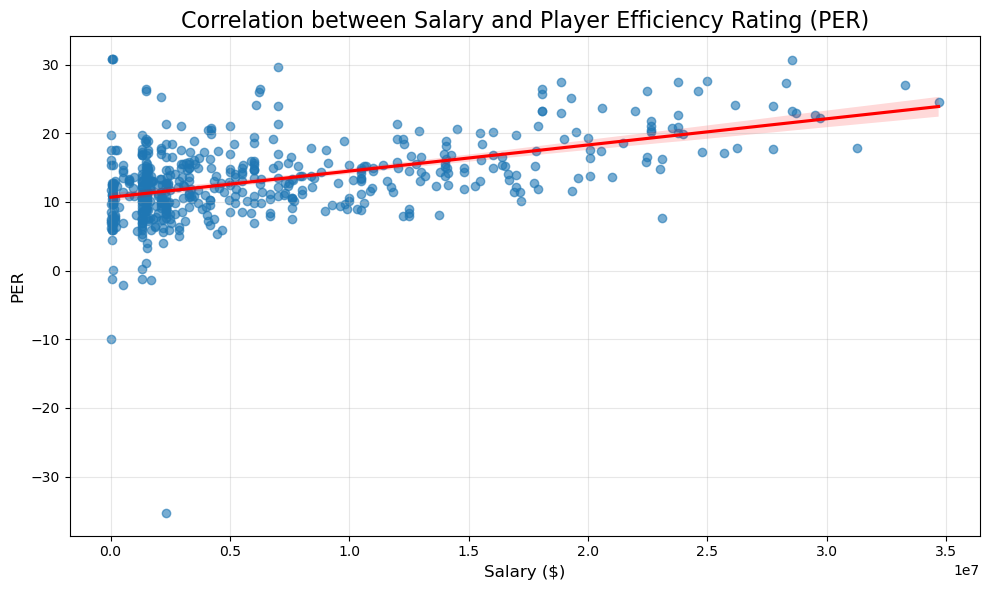

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='Salary', y='PER', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Correlation between Salary and Player Efficiency Rating (PER)', fontsize=16)
plt.xlabel('Salary ($)', fontsize=12)
plt.ylabel('PER', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Average Salary by Position (2017-18)
### This bar chart visualizes the average salaries of NBA players by position during the 2017-18 season. Positions like point guard (PG) and small forward (SF) tend to earn higher average salaries.


In [5]:
# Query for average salary by position
query = """
SELECT stats.Pos AS Position, AVG(salary.season17_18) AS avg_salary 
FROM NBA_season1718_salary AS salary
JOIN Seasons_Stats AS stats
ON salary.Player = stats.Player
WHERE stats.Year = 2017
GROUP BY stats.Pos
ORDER BY avg_salary DESC;
"""
avg_salary_by_pos = pd.read_sql(query, conn)

# Plotly bar chart
fig = px.bar(
    avg_salary_by_pos, 
    x='Position', 
    y='avg_salary', 
    title='Average Salary by Position (2017-18)', 
    labels={'Position': 'Position', 'avg_salary': 'Average Salary ($)'},
    text='avg_salary'
)
fig.update_traces(marker_color='orange', texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(title_font_size=16, xaxis=dict(title='Position'), yaxis=dict(title='Average Salary ($)'))
fig.show()

# Distribution of Player Ages (2017-18)
### This histogram shows the distribution of player ages in the 2017-18 NBA season. Most players are in their mid-to-late 20s, with fewer players in their 30s or younger than 20.


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



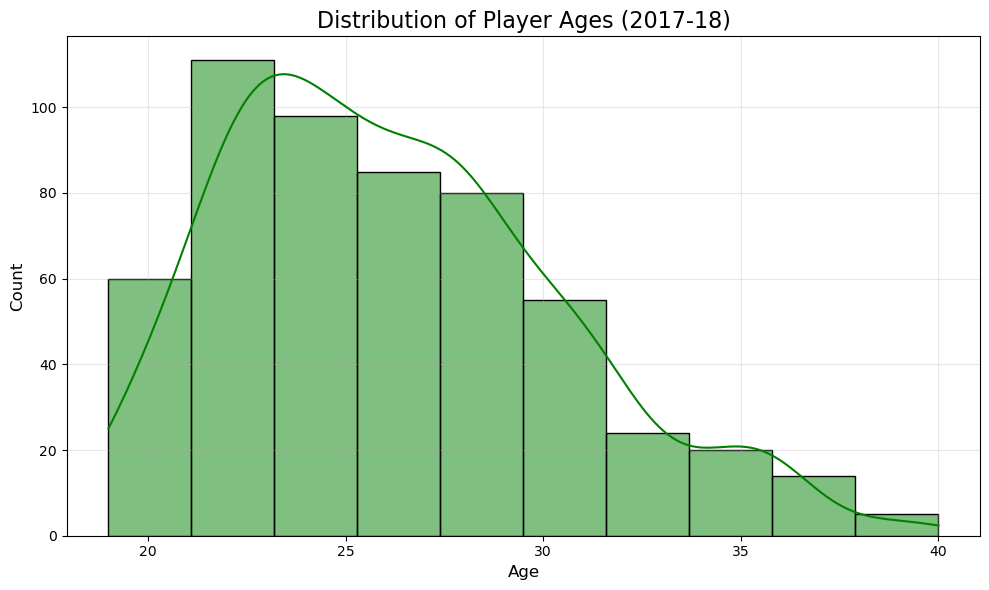

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='green')
plt.title('Distribution of Player Ages (2017-18)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Salary Distribution by Position
### This box plot shows the distribution of salaries by player position. It highlights the range of salaries for each position, as well as any outliers.


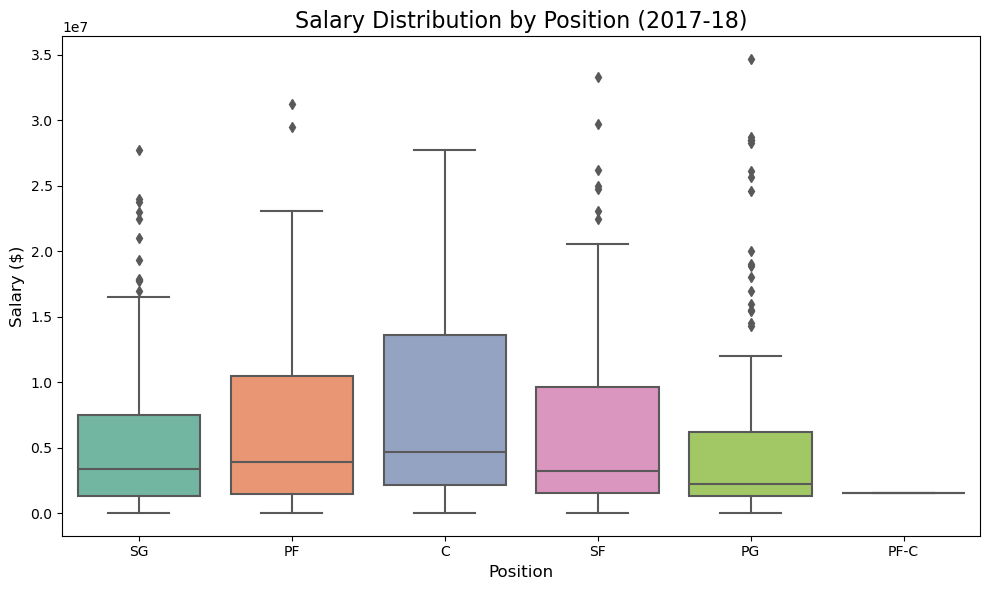

In [7]:
# Query
query = """
SELECT 
    stats.Pos AS Position, 
    salary.season17_18 AS Salary
FROM 
    NBA_season1718_salary AS salary
JOIN 
    Seasons_Stats AS stats
ON 
    salary.Player = stats.Player
WHERE 
    stats.Year = 2017;
"""
output = pd.read_sql(query, conn)

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Salary', data=output, palette="Set2")
plt.title("Salary Distribution by Position (2017-18)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.tight_layout()
plt.show()

# Salary and Win Shares by Position and Team
### This sunburst chart provides a hierarchical view of salaries and win shares, first grouped by position and then by team.


In [8]:
# Query
query = """
SELECT 
    stats.Pos AS Position, 
    salary.Tm AS Team, 
    SUM(salary.season17_18) AS Total_Salary, 
    SUM(stats.WS) AS Total_WinShares
FROM 
    NBA_season1718_salary AS salary
JOIN 
    Seasons_Stats AS stats
ON 
    salary.Player = stats.Player
WHERE 
    stats.Year = 2017
GROUP BY 
    stats.Pos, salary.Tm;
"""
output = pd.read_sql(query, conn)

# Plotting
fig = px.sunburst(
    output, 
    path=['Position', 'Team'], 
    values='Total_Salary', 
    color='Total_WinShares', 
    color_continuous_scale="Viridis",
    title="Salary and Win Shares by Position and Team"
)
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()

# Player Age vs. Performance (Bubble Plot)
### This bubble plot shows the relationship between player age and points scored (PTS). 
### Each bubble's size represents the player's salary, and the color gradient indicates age. 
### This visualization helps explore how age and salary affect player performance.

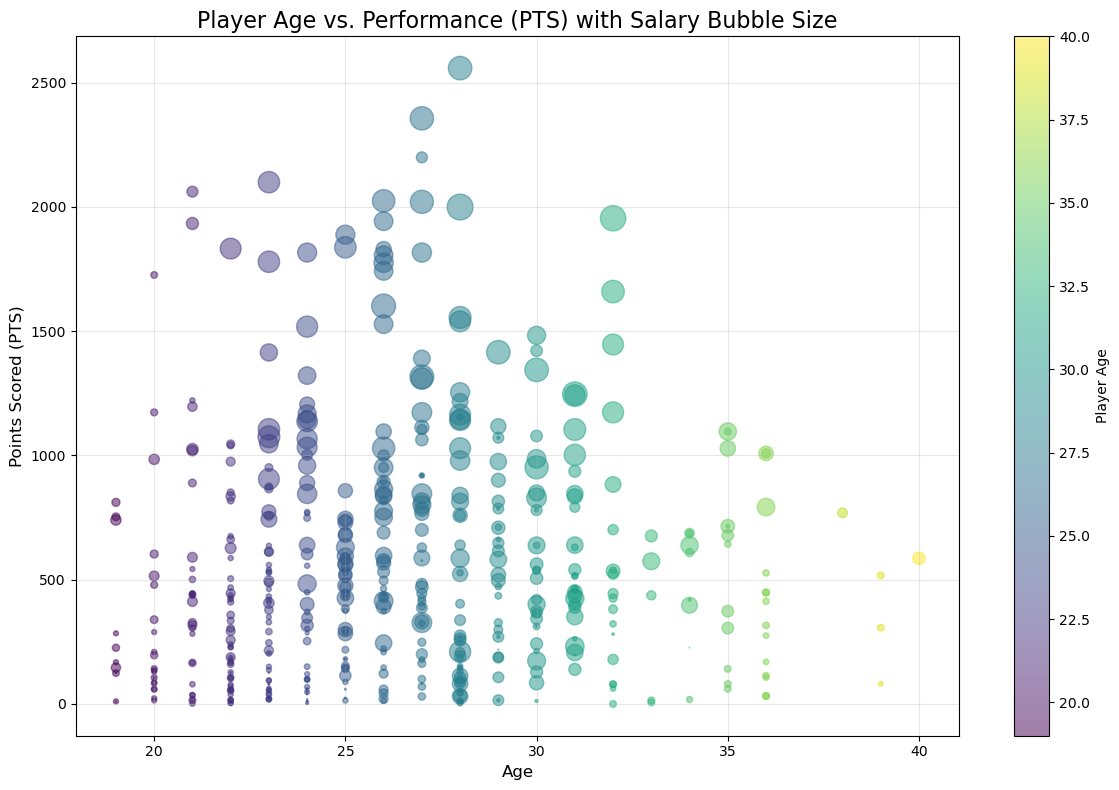

In [9]:
query = """
SELECT 
    Age, 
    PTS, 
    season17_18 AS Salary
FROM 
    Seasons_Stats AS stats
JOIN 
    NBA_season1718_salary AS salary
ON 
    stats.Player = salary.Player
WHERE 
    stats.Year = 2017 AND Age IS NOT NULL;
"""
output = pd.read_sql(query, conn)

# Plot Bubble Chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(
    output['Age'], 
    output['PTS'], 
    s=output['Salary'] / 100000, 
    alpha=0.5, 
    c=output['Age'], 
    cmap='viridis'
)
plt.colorbar(bubble, label="Player Age")
plt.title("Player Age vs. Performance (PTS) with Salary Bubble Size", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Points Scored (PTS)", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Top 5 Teams by Total Salary (Pie Chart)
### This interactive pie chart highlights the top 5 teams with the highest total salary expenditures. 
### Each slice represents a team's share of the total salary among these top teams, providing an overview of salary distribution.


In [10]:
query = """
SELECT 
    Tm AS Team, 
    SUM(season17_18) AS Total_Salary
FROM 
    NBA_season1718_salary
GROUP BY 
    Tm
ORDER BY 
    Total_Salary DESC
LIMIT 5;
"""
output = pd.read_sql(query, conn)

# Plotly Pie Chart
fig = px.pie(
    output, 
    names="Team", 
    values="Total_Salary", 
    title="Top 5 Teams by Total Salary (2017-18)",
    color_discrete_sequence=px.colors.sequential.RdBu
)
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0])
fig.show()


# Salary Distribution by Position (Box Plot)
### This box plot displays the range and distribution of salaries for each player position. 
### It shows the median salary, interquartile range, and outliers, providing insights into salary variability within positions.


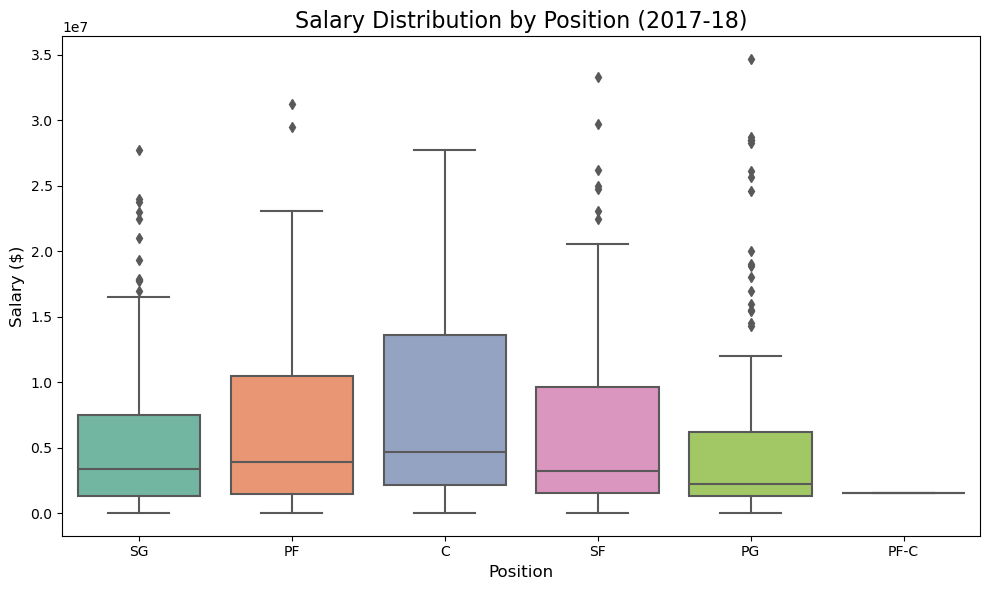

In [11]:
query = """
SELECT 
    stats.Pos AS Position, 
    salary.season17_18 AS Salary
FROM 
    NBA_season1718_salary AS salary
JOIN 
    Seasons_Stats AS stats
ON 
    salary.Player = stats.Player
WHERE 
    stats.Year = 2017;
"""
output = pd.read_sql(query, conn)

# Seaborn Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Salary', data=output, palette="Set2")
plt.title("Salary Distribution by Position (2017-18)", fontsize=16)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.tight_layout()
plt.show()

### Top 10 Most Efficient Players by Salary-to-PER Ratio
This chart identifies the players who deliver the best "value for money" based on their Player Efficiency Rating (PER) relative to their salary. A lower ratio indicates higher efficiency.


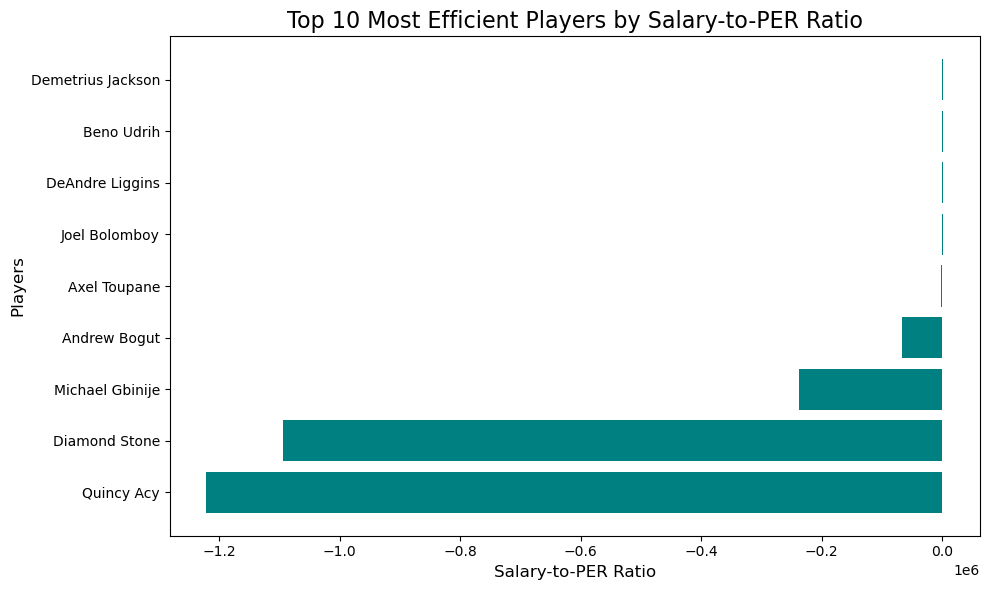

In [12]:
query = """
SELECT 
    salary.Player, 
    salary.season17_18 AS Salary,
    stats.PER, 
    ROUND(salary.season17_18 / stats.PER, 2) AS Salary_PER_Ratio
FROM 
    NBA_season1718_salary AS salary
JOIN 
    Seasons_Stats AS stats
ON 
    salary.Player = stats.Player
WHERE 
    stats.Year = 2017 AND stats.PER IS NOT NULL
ORDER BY 
    Salary_PER_Ratio ASC
LIMIT 10;
"""
salary_efficiency = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(salary_efficiency['Player'], salary_efficiency['Salary_PER_Ratio'], color='teal')
plt.title('Top 10 Most Efficient Players by Salary-to-PER Ratio', fontsize=16)
plt.xlabel('Salary-to-PER Ratio', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.tight_layout()
plt.show()


### Total Win Shares by Team
This chart highlights the total Win Shares (WS) for each team. Win Shares measure the total player contribution to team victories, helping identify the most impactful teams.


In [13]:
query = """
SELECT 
    stats.Tm AS Team, 
    SUM(stats.WS) AS Total_Win_Shares
FROM 
    Seasons_Stats AS stats
WHERE 
    stats.Year = 2017
GROUP BY 
    stats.Tm
ORDER BY 
    Total_Win_Shares DESC;
"""
team_win_shares = pd.read_sql(query, conn)

# Plotly Bar Chart
fig = px.bar(
    team_win_shares, 
    x='Team', 
    y='Total_Win_Shares',
    title='Total Win Shares by Team (2017-18)',
    labels={'Total_Win_Shares': 'Total Win Shares'},
    color='Total_Win_Shares'
)
fig.show()


### Salary Distribution Across Teams
This violin plot visualizes the distribution of player salaries for each team. It helps identify teams with higher variability in salaries and outliers.


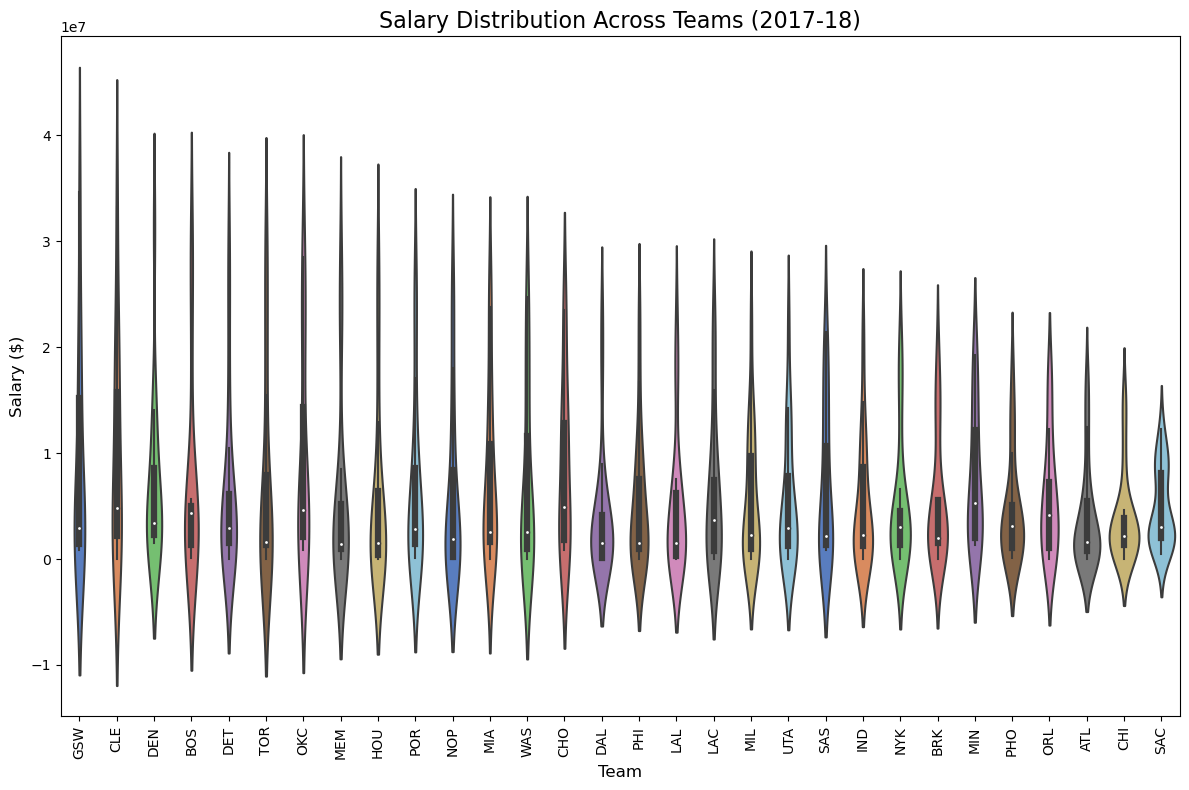

In [24]:
query = """
SELECT 
    salary.Tm AS Team, 
    salary.season17_18 AS Salary
FROM 
    NBA_season1718_salary AS salary;
"""
salary_by_team = pd.read_sql(query, conn)

# Seaborn Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Team', y='Salary', data=salary_by_team, palette="muted")
plt.title("Salary Distribution Across Teams (2017-18)", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Salary ($)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Top 10 Oldest Players and Their Points Scored
This chart showcases the oldest players in the league and the points they contributed during the 2017-18 season.


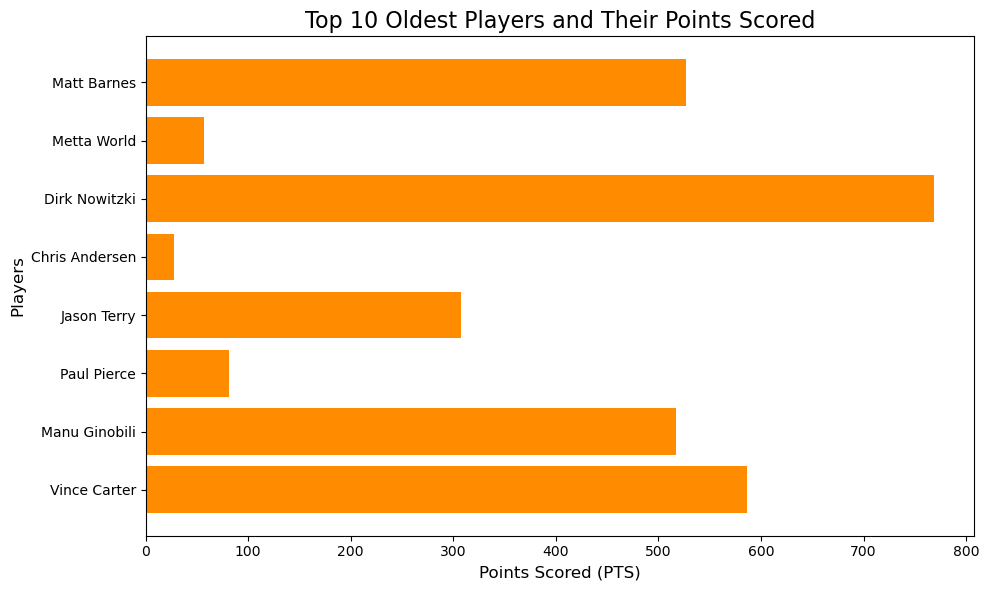

In [15]:
query = """
SELECT 
    stats.Player, 
    stats.Age, 
    stats.PTS, 
    stats.WS
FROM 
    Seasons_Stats AS stats
WHERE 
    stats.Year = 2017 AND stats.Age IS NOT NULL
ORDER BY 
    stats.Age DESC
LIMIT 10;
"""
oldest_players = pd.read_sql(query, conn)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(oldest_players['Player'], oldest_players['PTS'], color='darkorange')
plt.title('Top 10 Oldest Players and Their Points Scored', fontsize=16)
plt.xlabel('Points Scored (PTS)', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.tight_layout()
plt.show()


### Correlation Heatmap of Player Performance Metrics
This heatmap displays the relationships between key performance metrics (e.g., Points, Win Shares, Assists, etc.). It highlights strong positive or negative correlations.


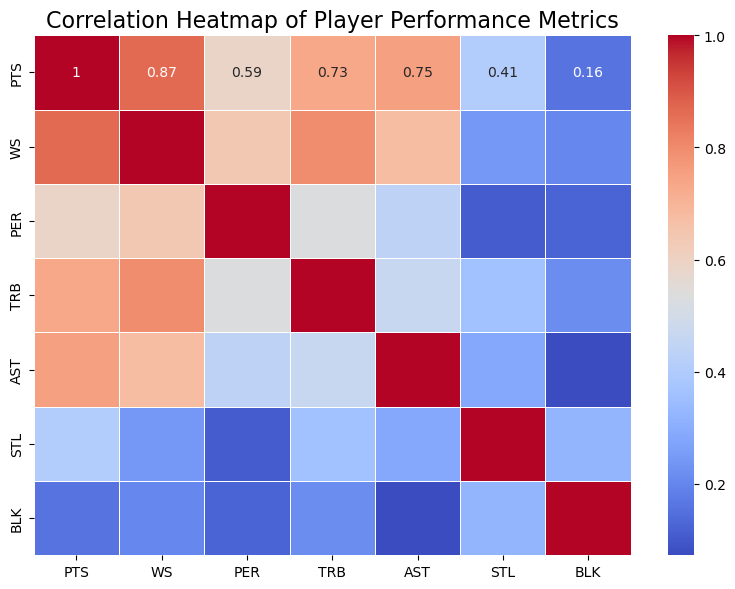

In [16]:
query = """
SELECT 
    PTS, 
    WS, 
    PER, 
    TRB, 
    AST, 
    STL, 
    BLK
FROM 
    Seasons_Stats
WHERE 
    Year = 2017;
"""
performance_metrics = pd.read_sql(query, conn)

# Compute Correlation Matrix
correlation_matrix = performance_metrics.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Player Performance Metrics", fontsize=16)
plt.tight_layout()
plt.show()


### Top 5 Teams by Average Player Age
This bar chart shows the teams with the oldest average player age, helping analyze team composition and experience levels.


In [17]:
query = """
SELECT 
    stats.Tm AS Team, 
    ROUND(AVG(stats.Age), 2) AS Avg_Age
FROM 
    Seasons_Stats AS stats
WHERE 
    stats.Year = 2017 AND stats.Age IS NOT NULL
GROUP BY 
    stats.Tm
ORDER BY 
    Avg_Age DESC
LIMIT 5;
"""
top_5_teams_age = pd.read_sql(query, conn)

# Plotly Bar Chart
fig = px.bar(
    top_5_teams_age, 
    x='Team', 
    y='Avg_Age', 
    title='Top 5 Teams by Average Player Age (2017-18)',
    labels={'Avg_Age': 'Average Age'}
)
fig.show()
